In [6]:
import numpy as np
from matplotlib import pyplot as plt

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization

from ase.build import bulk


In [7]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [8]:
def min_delta_rho(x0, *args):
    rho_ks, ions = args
    KE = Functional(type='KEDF',name='WT', rho0=x0)
    ions.set_charges(4)
    grid = DirectGrid(lattice=ions.cell, nr=[len(rho_ks),len(rho_ks),len(rho_ks[0,0])])
    rho_ini = DirectField(grid=grid)
    rho_ini[:] = ions.get_ncharges()/ions.cell.volume
    PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
    evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
    optimization_options = {'econv' : 1e-5*ions.nat}
    opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
                       optimization_method = 'TN')
    rho = opt.optimize_rho(guess_rho=rho_ini)
    diff = 0.5 * (np.abs(rho - rho_ks)).integral()
    print(diff)
    return diff

In [ ]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')
l = np.linspace(0.8, 1.4, 30)
delta_rho = []
R0 = []
vol = []
for n in np.arange(0,30,1):
    i = int(n)
    rho_ks = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_8cd/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'diamond', a=5.43, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    minn = minimize(min_delta_rho, 0.01, args = (rho_ks, ions), method='Powell', bounds=[[0,1]], options={'ftol' : 1e-3})
    vol.append(ions.get_volume())
    delta_rho.append(minn.fun)
    R0.append(minn.x)

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.761587554500E+01     -2.761588E+01   9.442638E+00    1       1       7.613993E-02    
1       -2.959533607724E+01     -1.979461E+00   4.609398E+00    14      1       5.391309E-01    
2       -3.024460206671E+01     -6.492660E-01   4.914956E+00    12      1       7.191870E-01    
3       -3.237592010848E+01     -2.131318E+00   3.111313E+00    15      2       9.539449E-01    
4       -3.253732865750E+01     -1.614085E-01   2.351305E-01    12      1       1.238490E+00    
5       -3.254525141158E+01     -7.922754E-03   4.156804E-02    13      1       1.449946E+00    
6       -3.254891376632E+01     -3.662355E-03   3.802220E-03    16      2       1.702609E+00    
7       -3.254901869435E+01     -1.049280E-04   2.707713E-04    7       1       1.838911E+00    
8       -3.254903718265E+01     -1.848830E-05   2.6

Text(0, 0.5, '$ρ_{0}$')

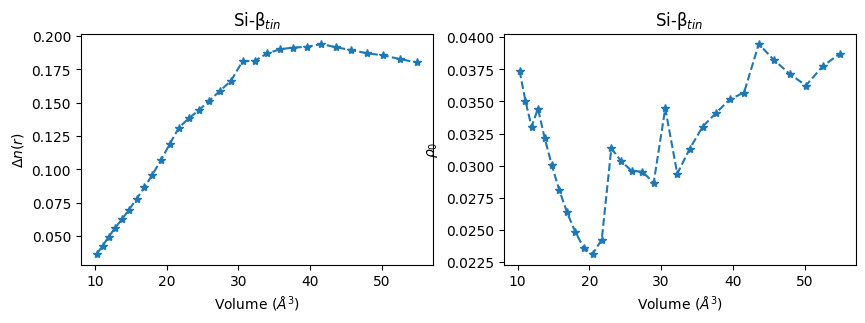

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/8,np.asarray(delta_rho)*1/8,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/8,np.asarray(R0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta n(r)$')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [14]:
minn.x

array([0.03871501])

In [17]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')
l = np.linspace(0.8, 1.4, 30)

for n in np.arange(29,30,1):
    i = int(n)
    rho_ks = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_8cd/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'diamond', a=5.43, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    minn =min_delta_rho(0.0225, rho_ks, ions)
    vol.append(ions.get_volume())


setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.384395628294E+01     -2.384396E+01   5.590656E+00    1       1       1.477449E-01    
!WARN : pAp small than zero :iter =  13 -4983374.936468657
1       -3.017028521099E+01     -6.326329E+00   2.689880E+01    14      2       1.068723E+00    
2       -3.114837721880E+01     -9.780920E-01   1.946672E+00    9       1       1.591368E+00    
3       -3.129805409352E+01     -1.496769E-01   6.442179E-01    14      1       2.362312E+00    
4       -3.134422357734E+01     -4.616948E-02   9.011667E-02    20      1       3.356534E+00    
5       -3.135042300237E+01     -6.199425E-03   1.591857E-02    13      1       4.017739E+00    
6       -3.135188751954E+01     -1.464517E-03   7.791690E-03    13      1       4.694327E+00    
7       -3.135267915679E+01     -7.916372E-04   1.430972E-03    23      1       5.853957E

In [18]:
minn

2.0370925556856294